### 动手编程

### 生成多个邮件
我们想统一发送多封邮件，我们有一个姓名列表，一个邮件主题，我们想通过程序为每一个人生成一个邮件。

In [ ]:
# Python program to mail merger
# Names are in the file names.txt
# Body of the mail is in body.txt

# open names.txt for reading
with open("names.txt",'r',encoding = 'utf-8') as names_file:
    with open("body.txt",'r',encoding = 'utf-8') as body_file:
        body = body_file.read()
        for name in names_file:
            mail = "Hello "+name+body
            with open(name.strip()+".txt",'w',encoding = 'utf-8') as mail_file:
                mail_file.write(mail)

我们有图像文件一枚
<img src="微信二维码_Beijing.jpeg" width= 200px/>
格式jpeg,大多数的文件头部保存有文件信息，例如jpeg文件头有 长、高信息，颜色，灰阶等。<br/>
不用任何现成的库，我们获取图像文件jpeg的长宽信息<br/>
注意，高 信息在 第164为开始，2字节<br/>
宽信息是之后两字节<br/>


In [7]:
def jpeg_res(filename):
    with open(filename,'rb') as img_file:
        # height of image (in 2 bytes) is at 164th position
        img_file.seek(163)

        # read the 2 bytes
        a = img_file.read(2)

        # calculate height
        height = (a[0] << 8) + a[1]

        # next 2 bytes is width
        a = img_file.read(2)

        # calculate width
        width = (a[0] << 8) + a[1]

    print("The resolution of the image is",width,"x",height)

jpeg_res("微信二维码_Beijing.jpeg")

The resolution of the image is 860 x 860


## 如何合并文件并提起内容

假设一个文件夹下面有很多excel文件，文件名符合以下规律
```
<project_name>_<number>
```
希望把数据提取出来并合并成为一个excel

In [67]:
import os
import pandas as pd

In [68]:
dir_name = "data"
all_files=os.listdir(dir_name)

In [69]:
file_dic = dict()
for file in all_files:
    file_name, ext_name = os.path.splitext(file)
    name_ary=file_name.split('_')
    real_name = "_".join(name_ary[0:len(name_ary)-1])
    if real_name in file_dic.keys():
        name_list = file_dic[real_name].append(file)
    else:
        file_dic[real_name]=list()
        file_dic[real_name].append(file)
print(file_dic)

all_pandas={}
for k, v in file_dic.items():    
    all_pandas[k]= None
    need_contat = []
    for open_file in v:
        df = pd.read_excel("data/{}".format(open_file))
        need_contat.append(df)
    all_pandas[k]=pd.concat(need_contat)

{'joshua_2015': ['joshua_2015_1.xls', 'joshua_2015_2.xls', 'joshua_2015_3.xls'], 'peng': ['peng_1.xls', 'peng_2.xls', 'peng_3.xls']}


In [73]:
all_pandas["peng"]

,5,6,7
0,7,8,9
1,10,11,12
0,7,8,9
1,10,11,12
0,7,8,9
1,10,11,12


把以下字符串按照长度排序
```
Browse the docs online or download a copy of your own. Python's documentation, tutorials, and guides are constantly evolving.
Python is an easy to learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms.
The Python interpreter and the extensive standard library are freely available in source or binary form for all major platforms from the Python Web site, https://www.python.org/, and may be freely distributed. The same site also contains distributions of and pointers to many free third party Python modules, programs and tools, and additional documentation.
```

In [61]:
a_strings= [
    "Python is an easy to learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms.",
    "Browse the docs online or download a copy of your own. Python's documentation, tutorials, and guides are constantly evolving.",
    "The Python interpreter and the extensive standard library are freely available in source or binary form for all major platforms from the Python Web site, https://www.python.org/, and may be freely distributed. The same site also contains distributions of and pointers to many free third party Python modules, programs and tools, and additional documentation."]

# sort list with key
sorted_string = sorted(a_strings, key=len)

# print list
for string in sorted_string:
    print(string)

Browse the docs online or download a copy of your own. Python's documentation, tutorials, and guides are constantly evolving.
The Python interpreter and the extensive standard library are freely available in source or binary form for all major platforms from the Python Web site, https://www.python.org/, and may be freely distributed. The same site also contains distributions of and pointers to many free third party Python modules, programs and tools, and additional documentation.
Python is an easy to learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms.


你有一个目录，放了你一个月的日记，都是 txt，为了避免分词的问题，假设内容都是英文，请统计出你认为每篇日记最重要的词。

In [2]:
with open('oldman.txt', 'r') as fin:
    all_text = fin.readlines()

In [21]:
all_strings=("".join(all_text))
all_strings=all_strings.strip("\n")
words = all_strings.split(" ")
# we need counter {key:value,}
stat_counter = {}
for word in words:
    if word in stat_counter.keys():
        stat_counter[word] += 1
    else:
        stat_counter[word] = 1

In [47]:
numbers = {'first': 1, 'second': 2, 'third': 3, 'Fourth': 4}
sorted(numbers.values())
type(sorted(stat_counter.values()))

In [62]:
sorted(stat_counter, key=stat_counter.get, reverse=True)[0:10]
#    print(w, stat_counter[w])

['the', 'and', 'he', 'of', 'I', 'to', 'his', 'was', 'it', 'a']

The **Digit's Image Data** is a 3D list. The quiz for this session is build arround it.
Run the code below to retrieve 100 sample data.

In [81]:
from sklearn import datasets
import random
random.seed(2016) # This will make sure the random sample you create is the same as mine.

digit_data = dict(datasets.load_digits())
sample_index = random.sample(range(len(digit_data['images'])), 100)
digit_images = [digit_data['images'][i] for i in sample_index]
digit_true_label = [digit_data['target'][i] for i in sample_index]

The goal for this quiz is to find a way to predict whether a image is 0 or not based only on the image data, the 2d array.
<img src='img/digits.png' width = 400px/>

### Q1
How many 0s are their in this 100 samples?

Hint (The hint is hidden in white, you could see it by selecting it):

In [108]:
result = 0
# Your code below
result = sum([1 for i in digit_true_label if i == 0])
# Your code above
result

9

### Q2
You could show the image by using the following code:
>```
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(_____,            # Fill the 2d array in the _____
           plt.cm.gray_r     # This is an input indicate the color scale
          )
```

Find out the 1st image that is 5. The image should look like this:

<img src='img/digit_image_for_5.png' width = 100px align='left'/>

In [115]:
a = digit_true_label.index(0)
a

22

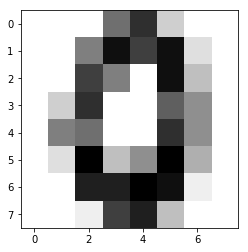

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
sample_2d_array =digit_images[22]
 #digit_images[digit_true_label.index(5)] # Change 5 to other values

import matplotlib.pyplot as plt
plt.imshow(sample_2d_array,  
           plt.cm.gray_r     
          )

### Q3
Given an 2d-array:
>```
digit_images[99]
>>>> [[  0.,   2.,  16.,  16.,  16.,  16.,   3.,   0.],
     [  0.,   1.,  16.,  13.,   6.,   4.,   0.,   0.],
     ...
```

Set all the numbers in this 2d array either to 1 or 0 based on whether if it's larger than 10 or not. The result should look like this:
>```
[[ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  0.  0.  0.  0.]
 ...
```

[[ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0.]]


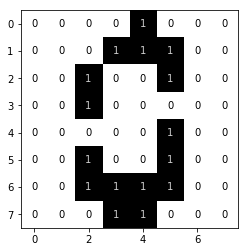

In [111]:
import copy
new_image = copy.copy(digit_images[digit_true_label.index(0)])

# Your code below
for row_index in range(len(new_image)):
    for col_index in range(len(new_image[row_index])):
        if new_image[row_index][col_index] > 10:
            new_image[row_index][col_index] = 1
        else:
            new_image[row_index][col_index] = 0

# Your code above
print(new_image)
plt.imshow(new_image,  
           plt.cm.gray_r     
          )

import numpy as np
for (i, j), value in np.ndenumerate(new_image):
    if value < 1:
        plt.text(j, i, int(value), ha='center', va='center', color = "#000000")
    else:
        plt.text(j, i, int(value), ha='center', va='center', color = "#cccccc")    

### Q4
Try to use list comprehension and for loop to create a 8 * 8 list like this:
>```
[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]
```

Save the value to the **result** variable.

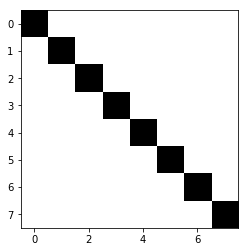

In [90]:
# your code below
rows = 8
cols = 8
result = [ ([0] * cols) for row in range(rows) ]
for i in range(len(result)):
    result[i][i] = 1

# your code above
plt.imshow(result,  
           plt.cm.gray_r     
          )

### Q5
Create a function, sum_of_2d_list(), which takes a 2d list as input, and return the sum of all the digits in it.

In [92]:
def sum_of_2d_list(a_2d_list):
    # your code below
    output = 0
    for rows in a_2d_list:
        output += sum(rows)
    
    # your code above
    return output

# test case
print(sum_of_2d_list(digit_images[0])) # 262.0
print(sum_of_2d_list(digit_images[1])) # 296.0
print(sum_of_2d_list(digit_images[2])) # 259.0
print(sum_of_2d_list(digit_images[3])) # 354.0

331.0
257.0
268.0
327.0


### Q6
To find out whether a number is 0 or not, a good way is to check whether the center of the image is dark or not. For example: 
<img src = 'img/2D_list_image.png' align = 'left'/>
The sum of the numbers in the centers is 0.

Your task is to create a function, it takes a 2D list as input, and return the sum of the four numbers in the center.

Hint (The hint is hidden in white, you could see it by selecting it):

In [95]:
def sum_of_center(a_2d_array):
    # your code below
    output = [i[3:5] for i in a_2d_array[3:5]]
    output = sum_of_2d_list(output)
    
    # your code above
    return output

# test case
print(sum_of_center(digit_images[0])) # 30.0
print(sum_of_center(digit_images[1])) # 0.0
print(sum_of_center(digit_images[2])) # 52.0
print(sum_of_center(digit_images[3])) # 32.0

46.0
36.0
34.0
20.0


### Q7
Read the code below, try to understand:
* How it deal with the 3d list: digit_images.
* How it find out all the 0s in the digit_images.

In [107]:
num_of_samples = len(digit_images)
index_for_zeros = []
true_label_for_the_prediction = []

# Find out all the index that are 0s, 
# if the sum of center part is smaller than 20.
for i in range(num_of_samples):
    if sum_of_center(digit_images[i]) < 20:
        index_for_zeros.append(i)

# Find out all the corresponded true label.
# Turns out two are predicted wrong.
for ind in index_for_zeros:
    true_label_for_the_prediction.append(digit_true_label[ind])
    
print(true_label_for_the_prediction)

# There are twelve 0s and two 6s in the result.
# Which means all the 0s are correctly selected out
# Change the cut off here

[0, 1, 0, 4, 0, 4, 0, 0, 4, 0, 0, 5, 4, 0, 0]
